# Lesson 5 - Starter Code

In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn.linear_model

# read in the mammal dataset
os.chdir("/Users/adeniyiharrison/Desktop/General Assembly/DS-SF-32/dataset")
mammals = pd.read_csv("msleep.csv")
mammals = mammals[mammals.brainwt.notnull()].copy()

### Explore our mammals dataset

In [5]:
mammals.describe()

,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
count,56.000000,48.000000,30.000000,56.000000,56.000000,56.000000
mean,10.171429,1.916667,0.430556,13.828571,0.281581,202.981768
std,4.421794,1.184354,0.365570,4.421794,0.976414,945.856609
min,2.900000,0.400000,0.116667,4.100000,0.000140,0.005000
25%,7.575000,1.075000,0.183333,11.425000,0.002900,0.290000
50%,9.950000,1.800000,0.308333,14.050000,0.012400,2.250000
75%,12.575000,2.400000,0.537500,16.425000,0.125500,27.301250
max,19.900000,6.100000,1.500000,21.100000,5.712000,6654.000000


### Lets check out a scatter plot of body weight and brain weight

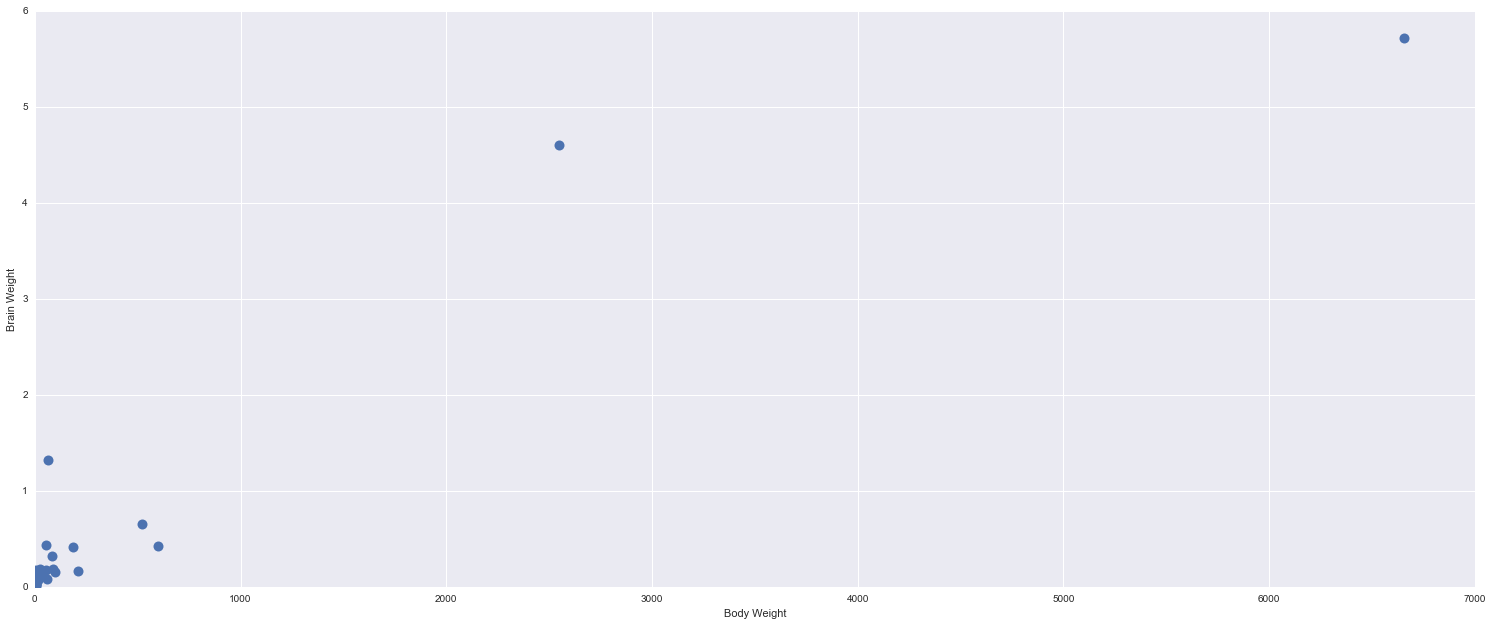

In [21]:
# create a matplotlib figure
fig = plt.figure(figsize = (20,8))
axes = fig.add_axes([0,0,1,1])
# generate a scatterplot inside the figure
axes.plot(mammals.bodywt, mammals.brainwt, '.', markersize=20)
axes.set_ylabel("Brain Weight")
axes.set_xlabel("Body Weight")
# show the plot
plt.show()

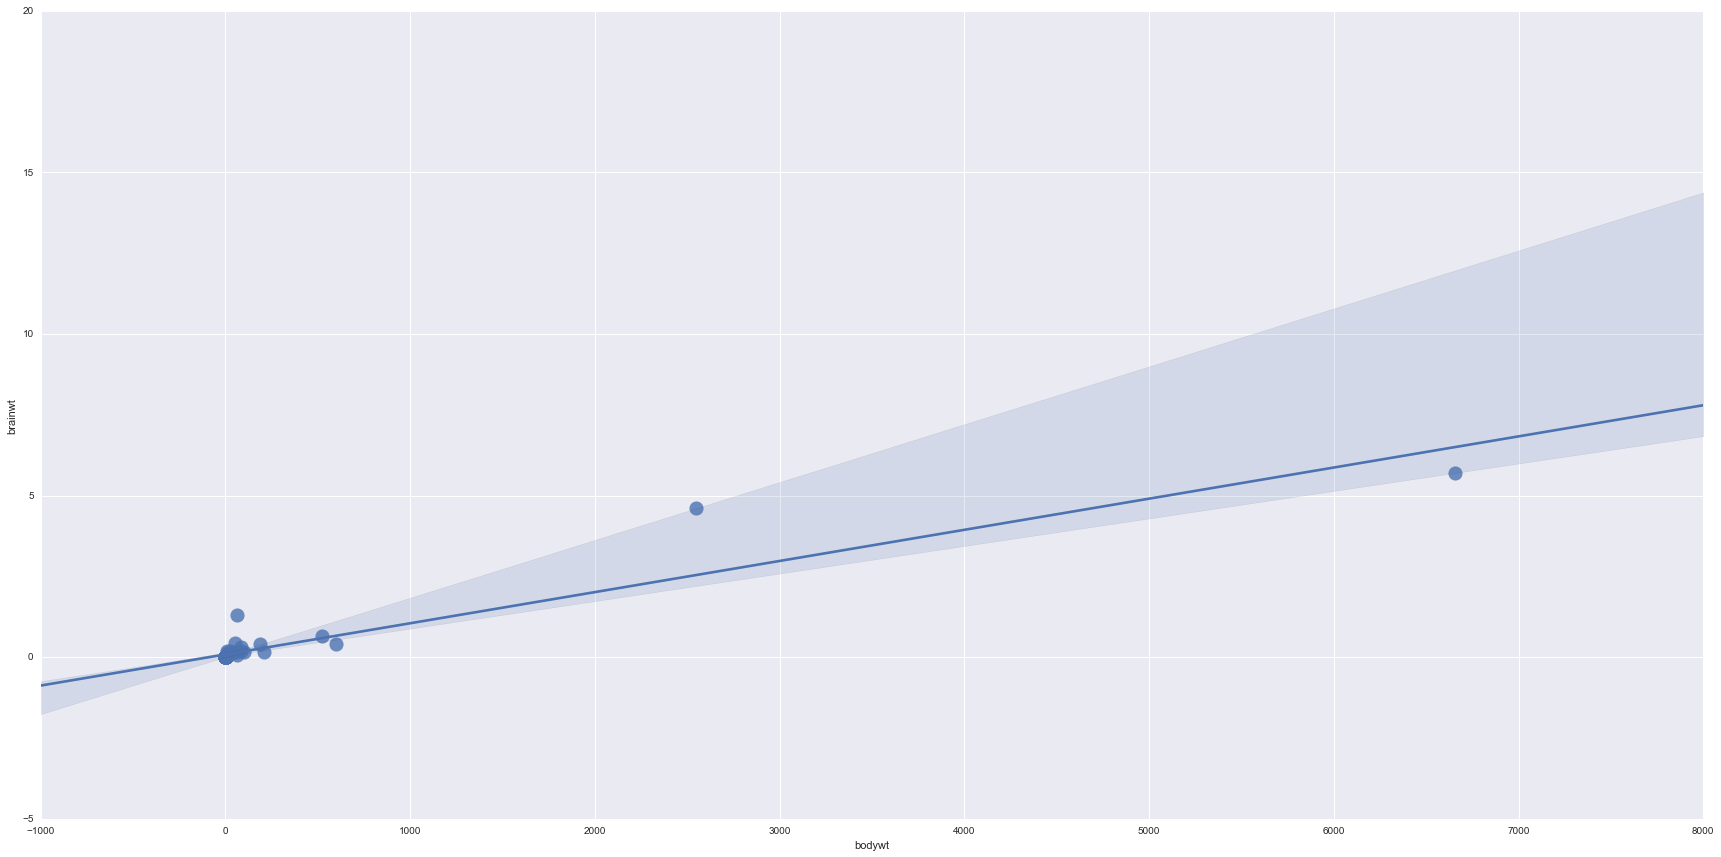

In [26]:
sns.lmplot('bodywt', 'brainwt', mammals, size =12, aspect = 2, scatter_kws={"s": 200})

In [48]:
mammals[["bodywt", "brainwt"]].corr()

,bodywt,brainwt
bodywt,1.000000,0.933782
brainwt,0.933782,1.000000


In [33]:
log_columns = ['bodywt', 'brainwt']
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

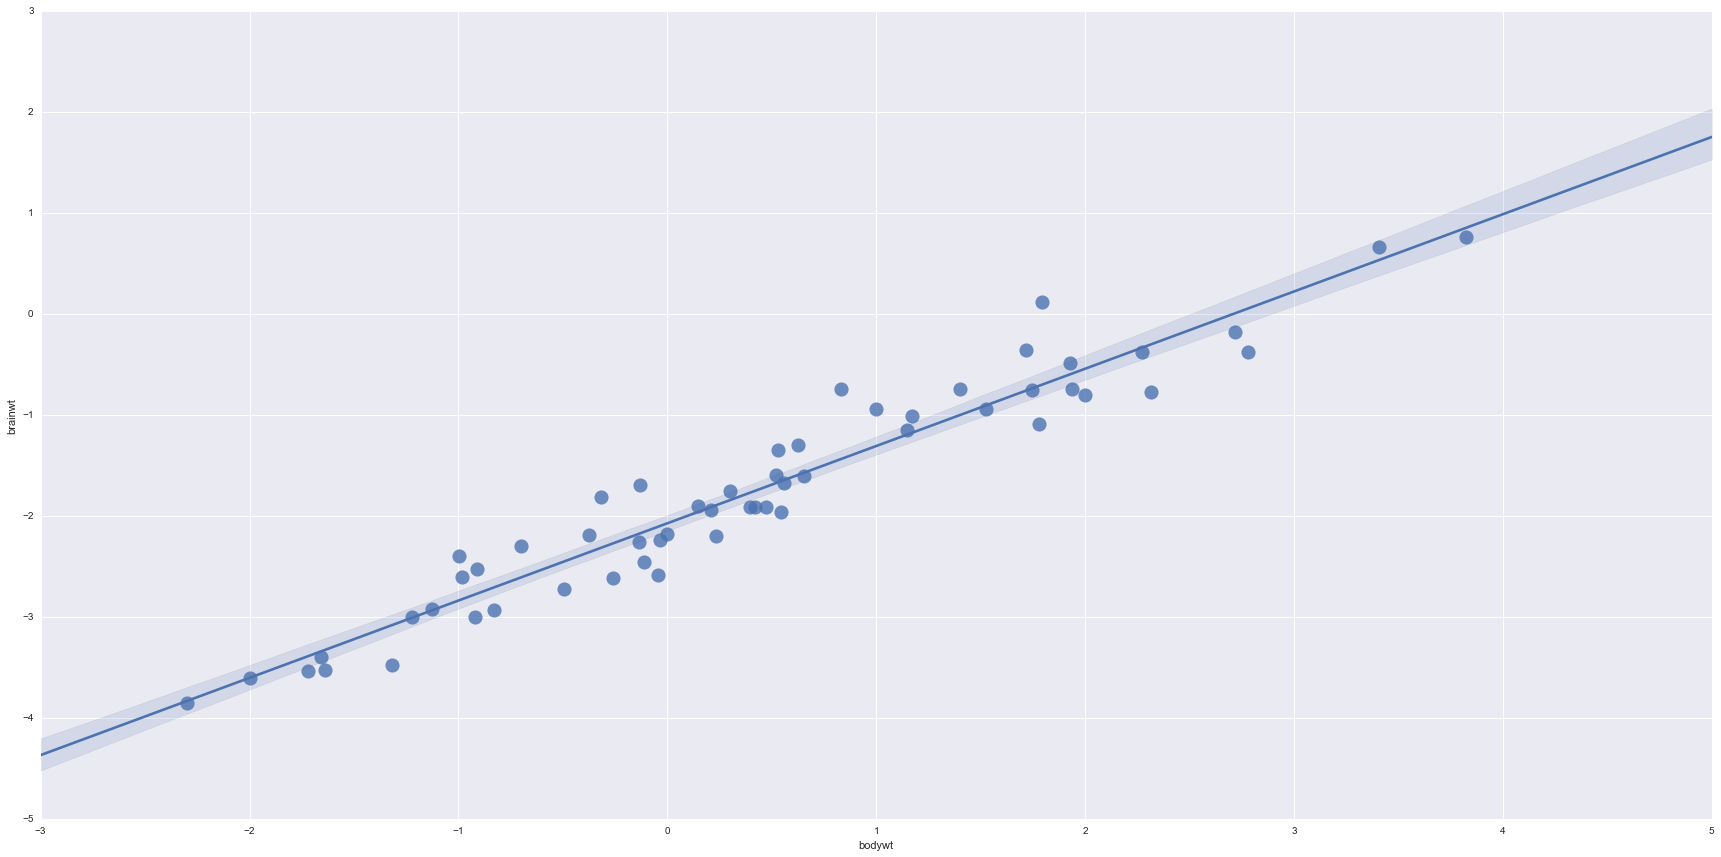

In [29]:
sns.lmplot('bodywt', 'brainwt', log_mammals, size =12, aspect = 2, scatter_kws={"s": 200})

## Guided Practice: Using Seaborn to generate single variable linear model plots (15 mins)
Update and complete the code below to use lmplot and display correlations between body weight and two dependent variables: sleep_rem and awake.


In [30]:
log_columns = ['bodywt', 'brainwt',"sleep_rem", "awake"]  # any others?
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

##### Complete below for sleep_rem and awake as a y, with variables you've already used as x.


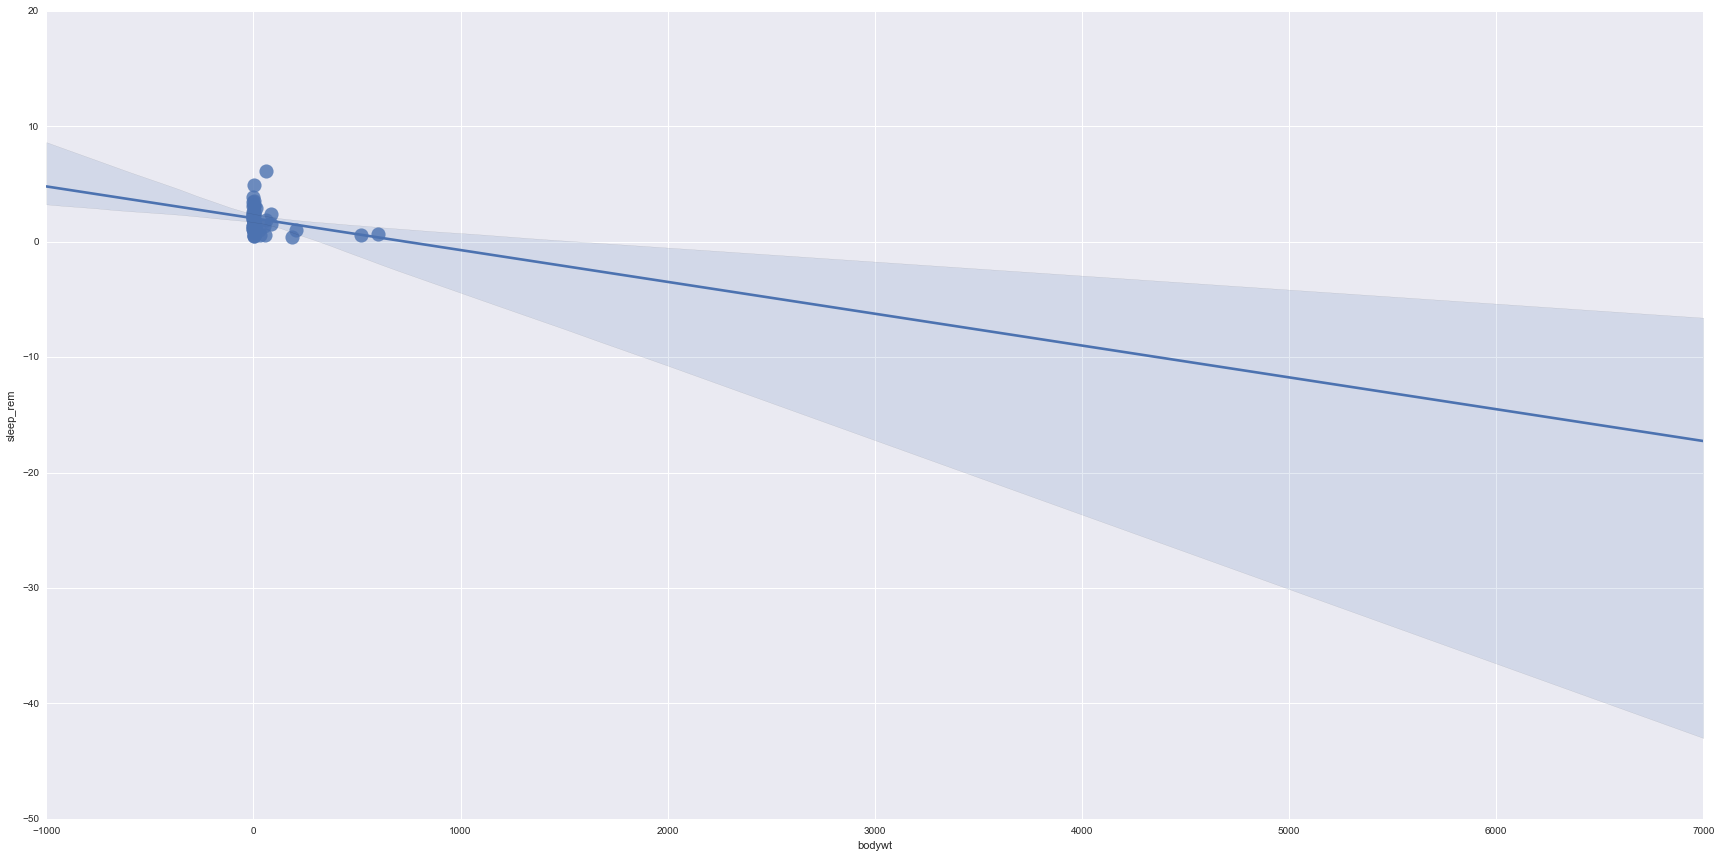

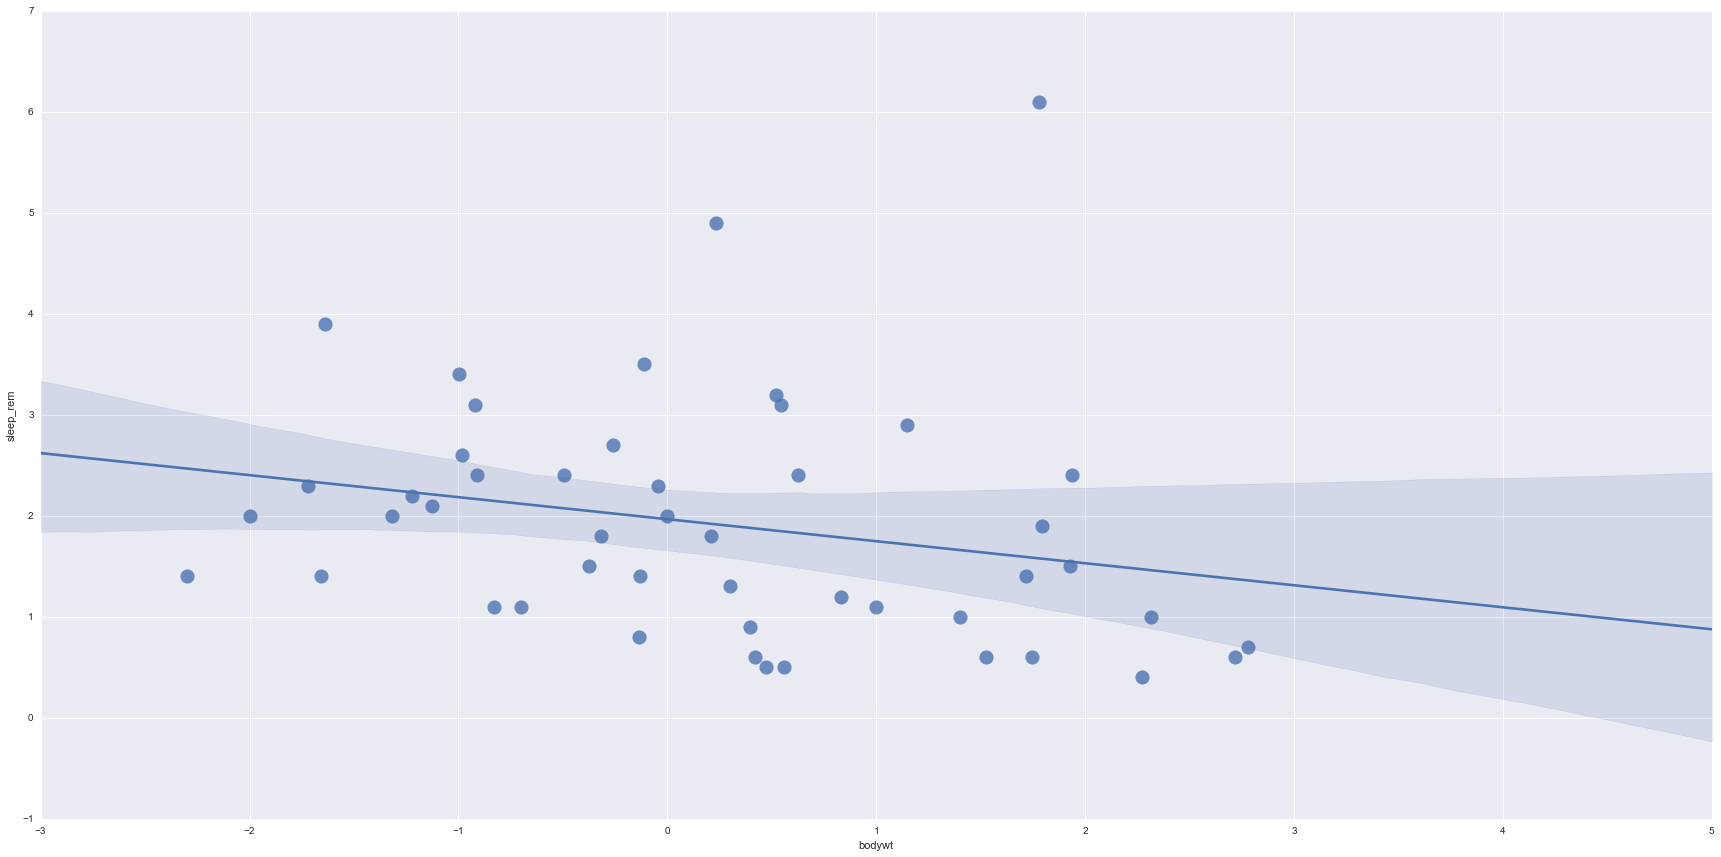

In [34]:
x = "bodywt"
y = "sleep_rem"
sns.lmplot(x, y, mammals, size =12, aspect = 2, scatter_kws={"s": 200})
sns.lmplot(x, y, log_mammals, size =12, aspect = 2, scatter_kws={"s": 200}) 

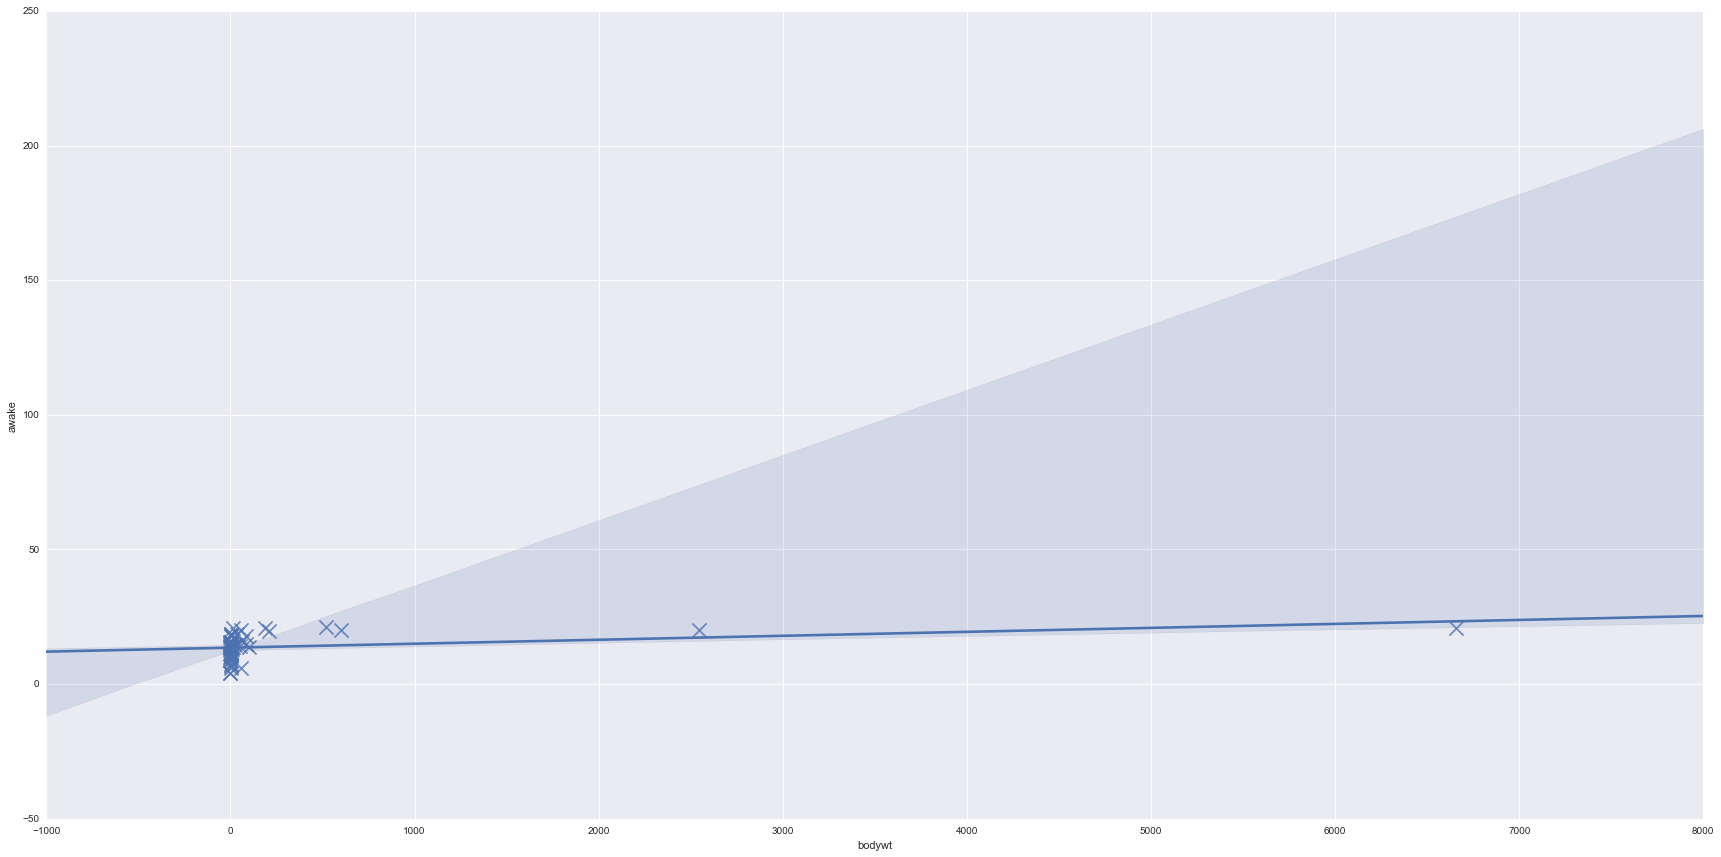

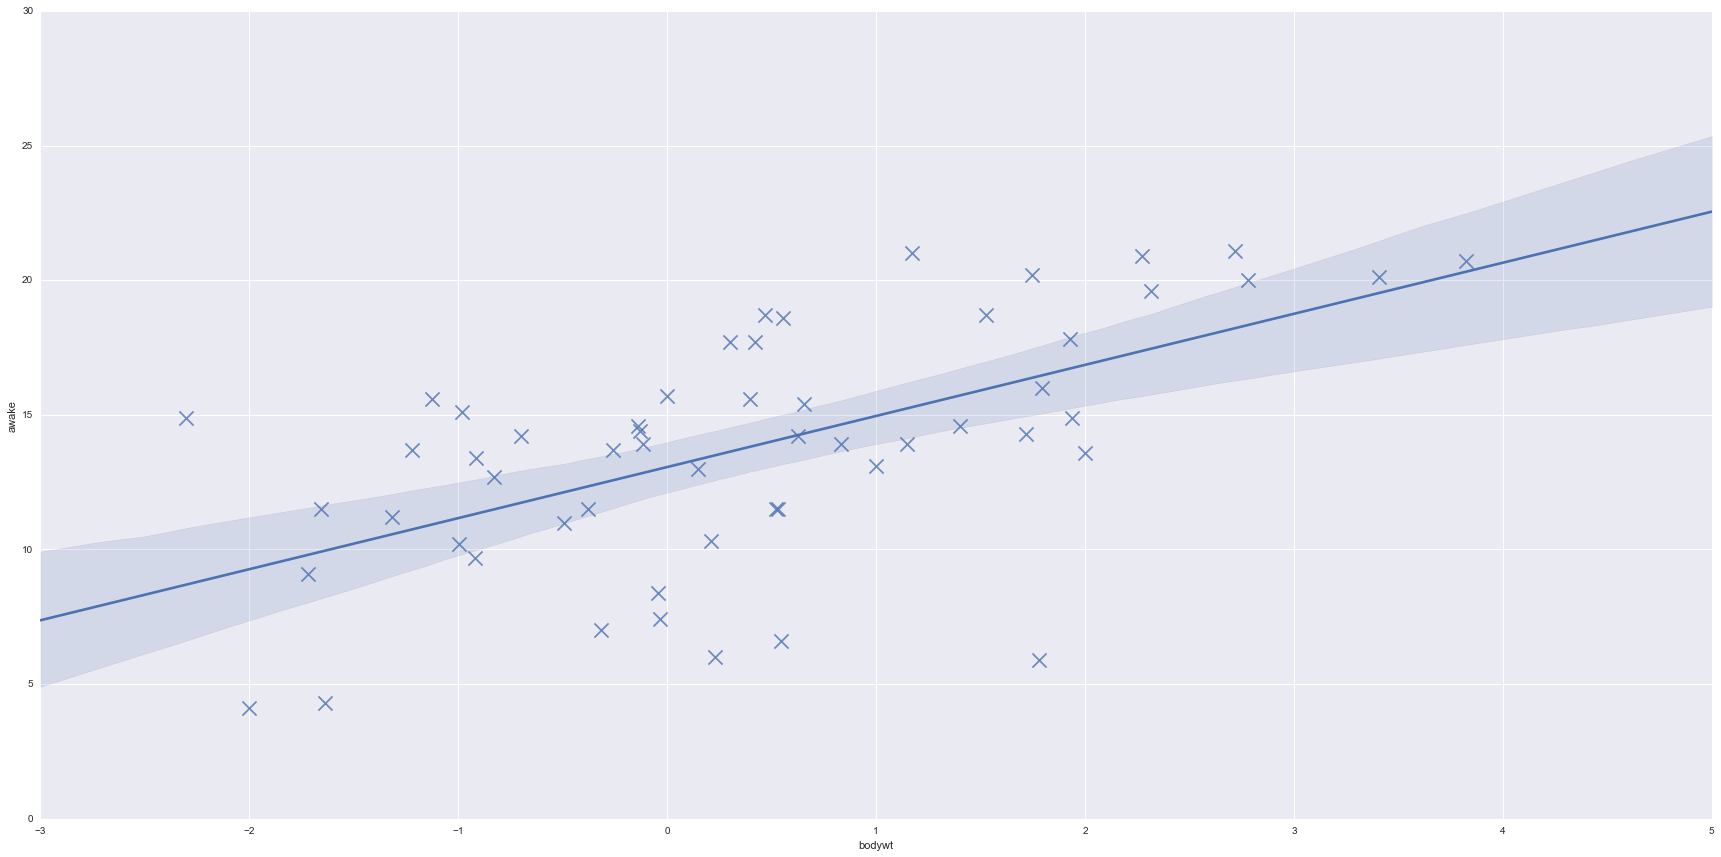

In [55]:
x = "bodywt"
y = "awake"
sns.lmplot(x, y, mammals, size =12, aspect = 2, scatter_kws={"s": 200}, markers = "x")
sns.lmplot(x, y, log_mammals, size =12, aspect = 2, scatter_kws={"s": 200}, markers = "x") 

## Introduction: Single Regression Analysis in statsmodels & scikit (10 mins)

In [172]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

X = mammals[['bodywt']]
y = mammals['brainwt']

# create a fitted model in one line
#formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='y ~ X', data=mammals).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Tue, 28 Feb 2017   Prob (F-statistic):           9.16e-26
Time:                        20:12:39   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080        -0.011     0.183
X              0.0010   5.03e-05     19.176      0.000         0.001     0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

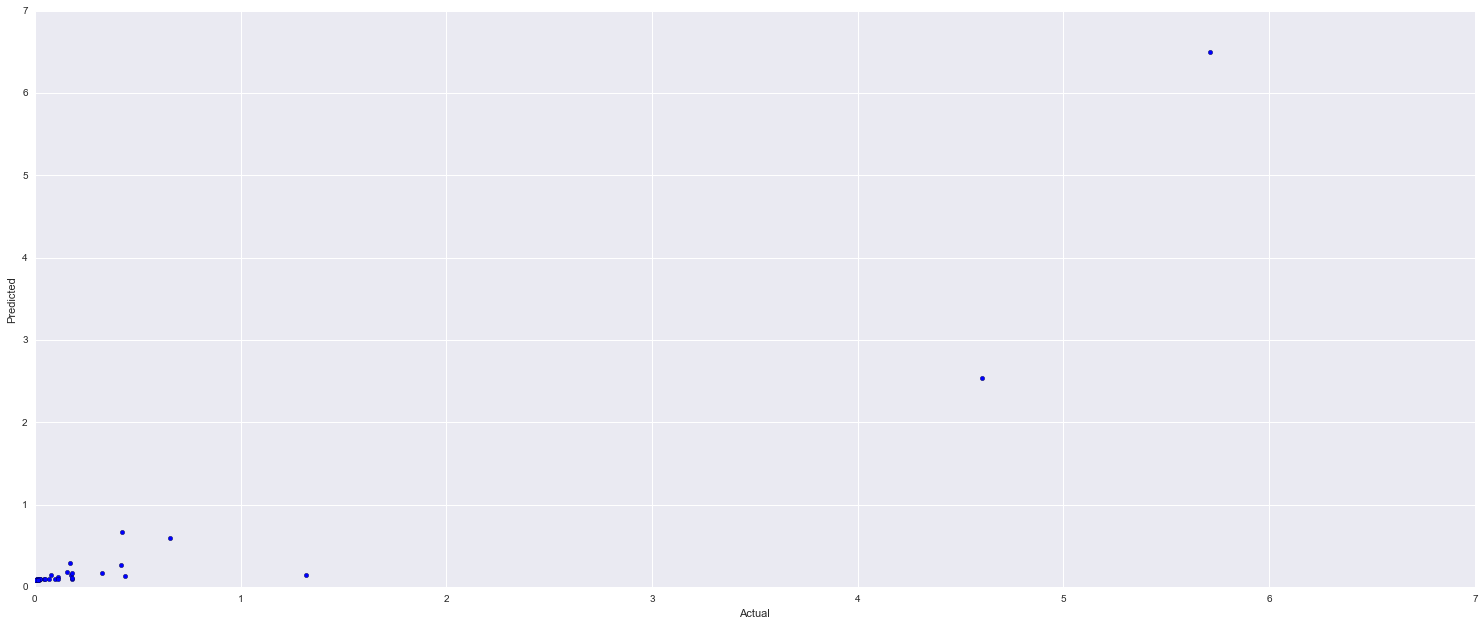

In [173]:
fig = plt.figure(figsize = (20,8))
axes = fig.add_axes([0,0,1,1])

axes.scatter(y = lm.predict(mammals["bodywt"]), x = mammals["brainwt"])
axes.set_ylim([0,7])
axes.set_xlim([0,7])
axes.set_ylabel("Predicted")
axes.set_xlabel("Actual")

#### Use Statsmodels to make the prediction

In [174]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'X': [50]})
lm.predict(X_new)

array([ 0.13411477])

### Repeat in Scikit with handy plotting

When modeling with sklearn, you'll use the following base principals:

- All sklearn estimators (modeling classes) are based on this base estimator. This allows you to easily rotate through estimators without changing much code.
- All estimators take a matrix, X, either sparse or dense.
- Many estimators also take a vector, y, when working on a supervised machine learning problem. Regressions are supervised learning because we already have examples of y given X.
- All estimators have parameters that can be set. This allows for customization and higher level of detail to the learning process. The parameters are appropriate to each estimator algorithm.

In [133]:
from sklearn.linear_model import LinearRegression
import scipy
# from sklearn import feature_selection, linear_model

[-0.07088001 -0.08564563 -0.24128685 -0.0294126  -0.00198376 -0.00320961
 -0.08111907 -0.07992217 -0.08497515 -0.08028126]
P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087


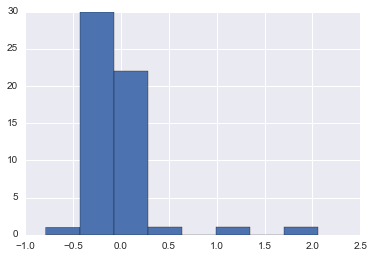

In [180]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values
    
    print(residuals[0:10])

    # print the necessary values
    print('P Values:', pvals)
    print('Coefficients:', algo.coef_)
    print('y-intercept:', algo.intercept_)
    print('R-Squared:', algo.score(X,y))
    plt.figure()
    b = np.ceil(np.sqrt(len(y)))
    plt.hist(residuals, bins=int(b))
    # keep the model
    return(algo)

X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [221]:
def newRegression(X,y):
    plt.figure(figsize = (20,8))
    
    
    lm = LinearRegression()
    algo = lm.fit(X,y)
    residuals = (y-algo.predict(X)).values
#     pvals = feature_selection.f_regression(X, y)[1]
    pvals = scipy.stats.ttest_ind(X,y)[1]
    
    print("P Values", pvals)
    print("Coefficients" ,lm.coef_)
    print("Y Intercept",lm.intercept_)
    print("R - Squared", lm.score(X,y))
    b = np.ceil(np.sqrt(len(y)))
    plt.hist(residuals, bins=int(b), color = "#9297a0")
    plt.title("Histogram of the Residuals")

    # keep the model
    return(algo)

P Values [ 0.11164814]
Coefficients [[ 0.00096395]]
Y Intercept [ 0.08591731]
R - Squared 0.871949198087


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

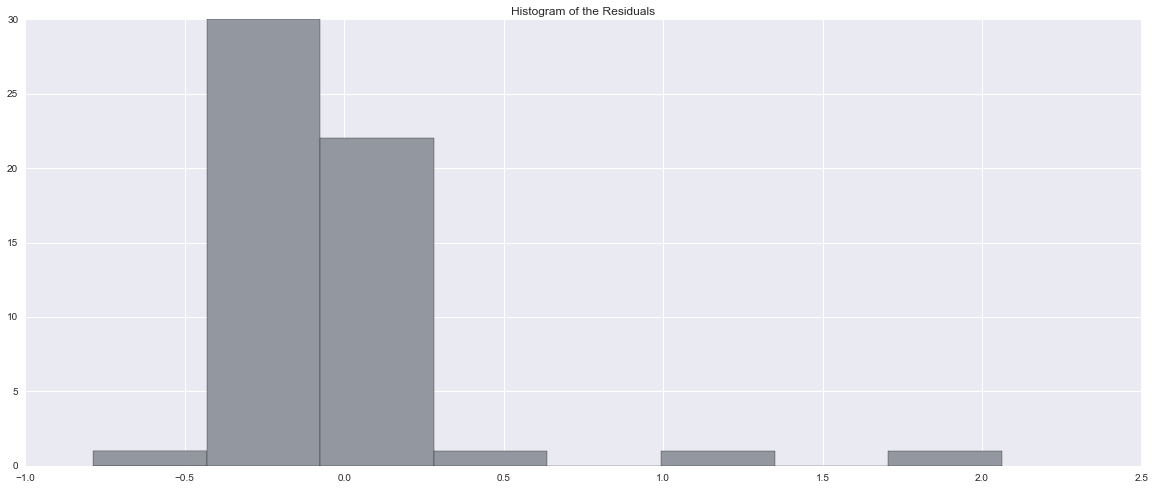

In [222]:
X = mammals[['bodywt']]
y = mammals[['brainwt']]

newRegression(X,y)
# test = newRegression(X,y)

## Demo: EVALUATING A MODEL (20 mins)

### What does our output tell us?



* What is the relationship between brain weight and body weight? 

* Is this variable significantly contributing to the model? 

* What does the residual plot tell us?

* How much variance does the current model explain? 

### Evaluating Fit, Evaluating Sense

Although we know there is a better solution to the model, we should evaluate some other sense things first. For example, given this model, what is an animal's brainwt if their bodywt is 0?

In [181]:
# prediction at 0?
print(lm.predict([[0]]))

[ 0.08591731]


In [191]:
test.predict(0)

array([[ 0.08591731]])

In [182]:
#From newRegression
lm.predict(0)

array([ 0.08591731])

[[-0.07088001]
 [-0.08564563]
 [-0.24128685]
 [-0.0294126 ]
 [-0.00198376]
 [-0.00320961]
 [-0.08111907]
 [-0.07992217]
 [-0.08497515]
 [-0.08028126]]
P Values: [  9.15540205e-26]
Coefficients: [[ 0.00096395]]
y-intercept: [ 0.08591731]
R-Squared: 0.871949198087
[[ 0.08591731]]


//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


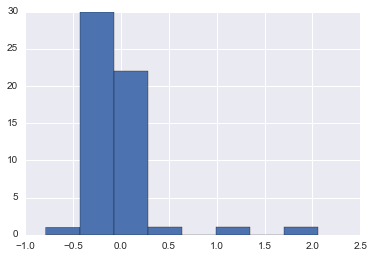

In [186]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(X, y, algo)
# prediction at 0?
print(lm.predict([[0]]))

## Intrepretation?


Answer:

## Guided Practice: Using the LinearRegression object (15 mins)

We learned earlier that the data in its current state does not allow for the best linear regression fit. 

With a partner, generate two more models using the log-transformed data to see how this transform changes the model's performance. 

Complete the following code to update X and y to match the log-transformed data. 

Complete the loop by setting the list to be one True and one False.

In [15]:
#starter
X =
y =
loop = []
for boolean in loop:
    print 'y-intercept:', boolean
    lm = linear_model.LinearRegression(fit_intercept=boolean)
    get_linear_model_metrics(X, y, lm)
    print

SyntaxError: invalid syntax (<ipython-input-15-04cc83d21c13>, line 2)

### Which model performed the best? The worst? Why?


Answer: 

### Advanced Methods! 

We will go over different estimators in detail in the future but check it out in the docs if you're curious (and finish a little early)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.23454772]
y-intercept: -1.85931606304
R-Squared: 0.483728109403

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)
P Values: [  3.56282243e-33]
Coefficients: [ 0.75797972]
y-intercept: -2.07102674342
R-Squared: 0.931769516561

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
P Values: [  3.56282243e-33]
Coefficients: [ 0.39504621]
y-intercept: -1.9242323166
R-Squared: 0.71382228495



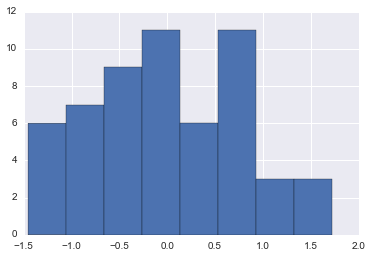

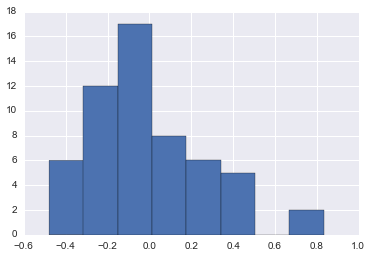

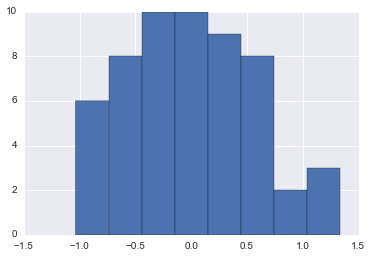

In [49]:
# loading other sklearn regression estimators
X = log_mammals[['bodywt']]
y = log_mammals['brainwt']

estimators = [
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
]

for est in estimators:
    print est
    get_linear_model_metrics(X, y, est)
    print


## Introduction: Multiple Regression Analysis using citi bike data (10 minutes)


In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the Y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called multicollinearity.

In [197]:
os.chdir("/Users/adeniyiharrison/Desktop/General Assembly/DS-SF-32/dataset")
bike_data = pd.read_csv('bikeshare.csv', index_col = 0)
bike_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### What is Multicollinearity?


+ When two or more variables in a regression are highly correlated; it can cause problems with the model.

+ We want our multiple variables to be mostly independent to avoid multicollinearity.

+ With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

+ Our data are already normalized between 0 and 1, so we'll start off with the correlations and modeling.

            temp     atemp    casual
temp    1.000000  0.987672  0.459616
atemp   0.987672  1.000000  0.454080
casual  0.459616  0.454080  1.000000
Axes(0.125,0.125;0.62x0.775)


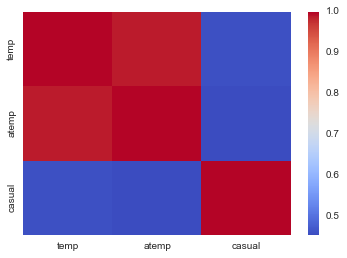

In [201]:
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = bike_data[['temp', 'atemp', 'casual']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap="coolwarm"))

### What does the correlation matrix explain?

Answer: That there is multicollinearity between atemp and temp

## We can measure this effect in the coefficients:



temp
[-2.43215468  4.92158647  1.92158647 -2.43215468 -5.43215468 -5.43215468
 -1.07841353  0.27532763 -4.43215468 -6.84711931]
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163
atemp
[ -8.20008481  -1.2198478   -4.2198478   -8.20008481 -11.20008481
  -7.25263866  -7.2198478   -6.25263866 -10.20008481 -11.09497711]
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733
temp, atemp
[-2.49121074  4.85881852  1.85881852 -2.49121074 -5.49121074 -5.44491365
 -1.14118148  0.20869499 -4.49121074 -6.89102219]
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661


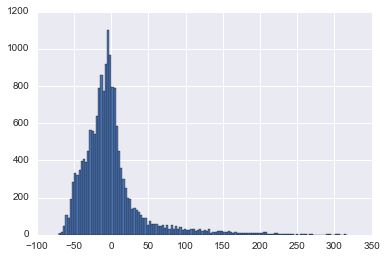

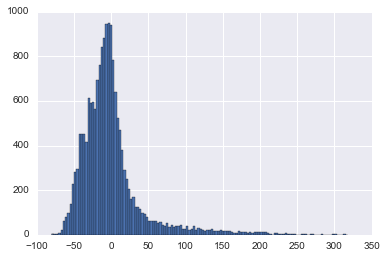

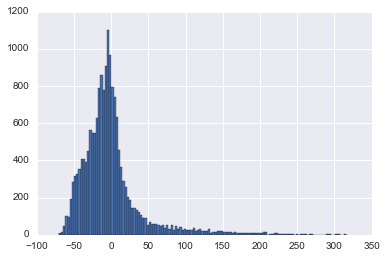

In [203]:
y = bike_data['casual']
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print(', '.join(x))
    get_linear_model_metrics(bike_data[x], y, linear_model.LinearRegression())
    print

###  Intrepretation?

Answer: atemp is not explaining anything additionally than just temp

### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?


[ 10.89391411  17.32567534  14.32567534   6.04153301   3.04153301
   3.04153301  11.32567534  17.41854784   4.04153301   2.88829757]
P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

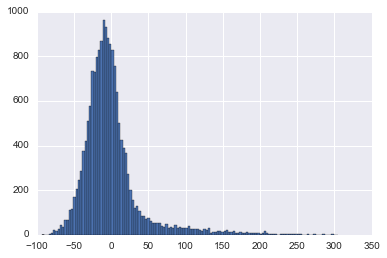

In [206]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]
get_linear_model_metrics(x, y, linear_model.LinearRegression())

#R squared imporves because youre now explaining more of the model


## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [209]:
bike_data["weathersit"].unique()

array([1, 2, 3, 4])

[-37.78515625 -32.78515625 -35.78515625 -37.78515625 -40.78515625
 -29.296875   -38.78515625 -39.78515625 -39.78515625 -32.78515625]
P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55   2.46181288e-01]
Coefficients: [  2.34550988e+13   2.34550988e+13   2.34550988e+13   2.34550988e+13]
y-intercept: -2.34550987861e+13
R-Squared: 0.0233354132913
------------------
[-37.54543065 -32.54543065 -35.54543065 -37.54543065 -40.54543065
 -29.59529049 -38.54543065 -39.54543065 -39.54543065 -32.54543065]
P Values: [  3.75616929e-73   3.43170021e-22   1.57718666e-55]
Coefficients: [ 37.87876398  26.92862383  13.38900634]
y-intercept: 2.66666666663
R-Squared: 0.0233906873841


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

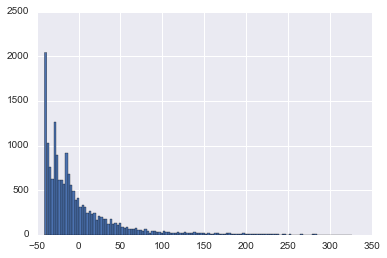

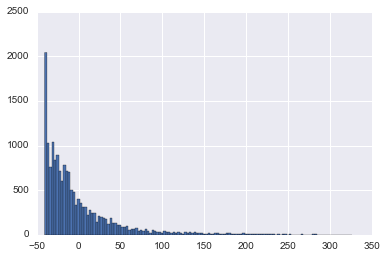

In [212]:
lm = LinearRegression()
y = bike_data['casual']
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y, lm)
print("------------------")
# drop the least significant, weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y, lm)

### Similar in Statsmodels

In [213]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     104.0
Date:                Tue, 28 Feb 2017   Prob (F-statistic):           1.13e-87
Time:                        21:09:19   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17374   BIC:                         1.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                -3.319e+12   5.17e+13     -0.064      0.949     -1.05e+14  9.79e+13
weather[[1, 2, 3, 4]][0]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][1]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][2]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
weather[[1, 2, 3, 4]][3]  3.319e+12   5.17e+13      0.064      0.949     -9.79e+13  1.05e+14
==============================================================================
Omnibus:                     8995.399   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58868.810
Skew:                           2.467   Prob(JB):                         0.00
Kurtosis:                      10.547   Cond. No.                     3.88e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [214]:
#droping one
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3]]', data=bike_data).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     138.7
Date:                Tue, 28 Feb 2017   Prob (F-statistic):           8.08e-89
Time:                        21:09:21   Log-Likelihood:                -92197.
No. Observations:               17379   AIC:                         1.844e+05
Df Residuals:                   17375   BIC:                         1.844e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 2.6667     28.134      0.095      0.924       -52.478    57.812
weather[[1, 2, 3]][0]    37.8788     28.138      1.346      0.178       -17.274    93.031
weather[[1, 2, 3]][1]    26.9286     28.143      0.957      0.339       -28.235    82.092
weather[[1, 2, 3]][2]    13.3890     28.164      0.475      0.635       -41.814    68.592
==============================================================================
Omnibus:                     9001.632   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58962.554
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      10.553   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the interpretation ? Do you want to keep all your dummy variables or drop one? Why? 




Answer:

## Guided Practice: Combining non-correlated features into a better model (15 mins)

In [26]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:

- Add the three significant weather situations into our current model.
- Find two more features that are not correlated with current features... 
- but could be strong indicators for predicting guest riders.

In [27]:
#starter 
lm = linear_model.LinearRegression()
bikemodel_data = bike_data.join() # add in the three weather situations

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = # what are we getting the correlations of?
print correlations
print sns.heatmap(correlations, cmap=cmap)

columns_to_keep = [] #[which_variables?]
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, y, lm)

SyntaxError: invalid syntax (<ipython-input-27-97ddf3a04cab>, line 6)

In [ ]:
#sklearn
final_feature_set = bikemodel_data[columns_to_keep]

get_linear_model_metrics(final_feature_set, np.log10(y+1), lm)

In [ ]:
#Stats models
log_y = np.log10(y+1)
lm = smf.ols(formula=' log_y ~ temp + hum + windspeed + weather_1 + weather_2 + weather_3 + holiday + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23', data=bikemodel_data).fit()
#print the full summary
lm.summary()

## Independent Practice: Building models for other y variables (25 minutes)

We've completely a model together that explains casual guest riders. Now it's your turn to build another model, using a different y variable: registered riders.

#### Pay attention to:

* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and registered riders  
* having a feature space (our matrix) with low multicollinearity  
* model complexity vs explanation of variance: at what point do features in a model stop improving r-squared?  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?

#### Bonus

* Which variables would make sense to dummy (because they are categorical, not continuous)?  
* What features might explain ridership but aren't included in the data set? 
* Is there a way to build these using pandas and the features available?
* Outcomes If your model at least improves upon the original model and the explanatory effects (coefficients) make sense, consider this a complete task. 

### If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos!